In [ ]:
import numpy as np
import time
import pandas as pd
import seaborn as sns

from matplotlib import pyplot as plt


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Using TensorFlow backend.


11493376/11490434 [==============================] - 0s 0us/step


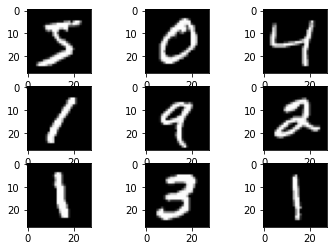

In [ ]:

from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
# print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
# print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
# load in tSNE 
from sklearn.manifold import TSNE

## Method 1: TSNE

In [ ]:
# transform into 2d shape for fit_transform
trainX=np.asarray(trainX)
trainX = trainX.reshape(60000, 784)


In [ ]:
# UNCOMMENT FOR FASHION MNIST DATA
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
trainX = trainX.reshape(60000, 784)
testX = testX.reshape(10000, 784)

In [ ]:
import time
time_start = time.time()
tsne = TSNE(n_components=2, random_state=0)
# tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)

tsne_results = tsne.fit_transform(trainX)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))

In [ ]:
data = {'tsne-2d-one': tsne_results[:,0], 'tsne-2d-two': tsne_results[:,1] }
df_subset = pd.DataFrame(data) 
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=trainy[0:60000],
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=1)

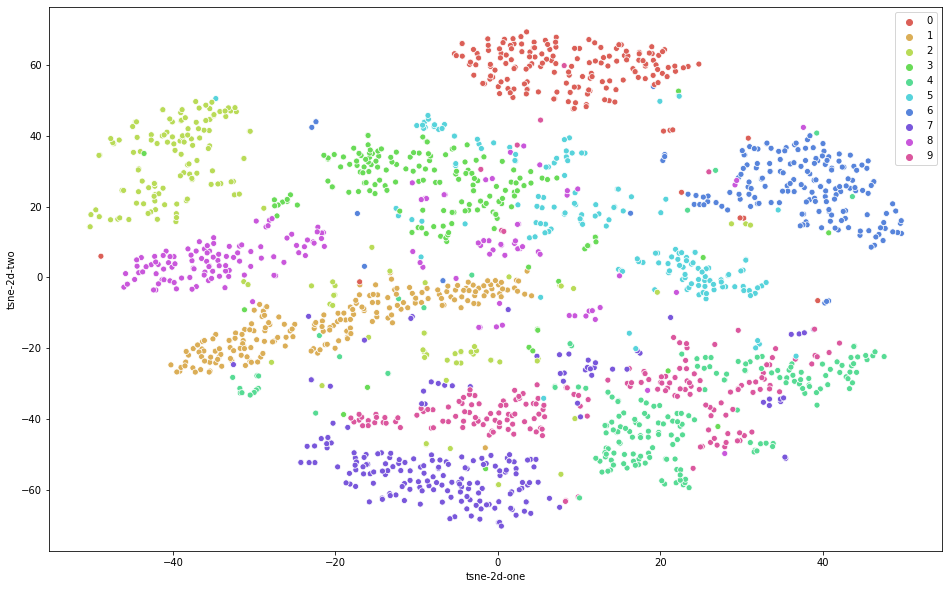

In [ ]:

data = {'tsne-2d-one': tsne_results[:,0], 'tsne-2d-two': tsne_results[:,1] }
df_subset = pd.DataFrame(data) 
df_subset['tsne-2d-one'] = tsne_results[:,0]
df_subset['tsne-2d-two'] = tsne_results[:,1]
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne-2d-one", y="tsne-2d-two",
    hue=trainy[0:1797],
    palette=sns.color_palette("hls", 10),
    data=df_subset,
    legend="full",
    alpha=1
)

## Method 2: TSNE

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data[:1000]
y = digits.target[:1000]

In [ ]:
tsne = TSNE(n_components=2, random_state=0)
X_2d = tsne.fit_transform(X)


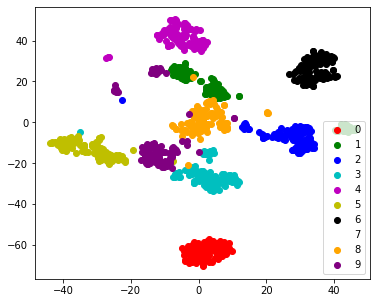

In [ ]:
target_ids = range(len(digits.target_names))

plt.figure(figsize=(6, 5))
colors = 'r', 'g', 'b', 'c', 'm', 'y', 'k', 'w', 'orange', 'purple'
for i, c, label in zip(target_ids, colors, digits.target_names):
    plt.scatter(X_2d[y == i, 0], X_2d[y == i, 1], c=c, label=label)
plt.legend()
plt.show()

## Method 3: Open T-SNE
https://github.com/pavlin-policar/openTSNE


This package allows new points to be added to the mapping. 

Run 2000 points of MNIST to train the t-SNE and then 1000 new test points 

In [ ]:
! pip install opentsne

     |████████████████████████████████| 1.8MB 2.7MB/s 


In [ ]:
from openTSNE import TSNE
from openTSNE.callbacks import ErrorLogger

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


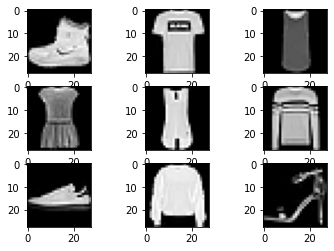

In [ ]:
'''(trainX, trainy), (testX, testy) = mnist.load_data()
testX.shape'''

# example of loading the fashion mnist dataset
from matplotlib import pyplot
from keras.datasets import fashion_mnist
# load dataset
(trainX, trainy), (testX, testy) = fashion_mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
trainX = trainX.reshape(60000, 784)
testX = testX.reshape(10000, 784)
x_train, y_train, x_test, y_test = trainX, trainy, testX, testy

In [ ]:
x_train.shape

(60000, 784)

In [ ]:
'''from sklearn import datasets

(trainX, trainy), (testX, testy) = mnist.load_data()
trainX = trainX.reshape(60000, 784)
testX = testX.reshape(10000, 784)

x_train=trainX[0:2000]
x_test=testX[0:1000]
y_train=trainy[0:2000]
y_test=testy[0:1000]
print("%d training samples" % x_train.shape[0])
print("%d test samples" % x_test.shape[0])'''

'from sklearn import datasets\n\n(trainX, trainy), (testX, testy) = mnist.load_data()\ntrainX = trainX.reshape(60000, 784)\ntestX = testX.reshape(10000, 784)\n\nx_train=trainX[0:2000]\nx_test=testX[0:1000]\ny_train=trainy[0:2000]\ny_test=testy[0:1000]\nprint("%d training samples" % x_train.shape[0])\nprint("%d test samples" % x_test.shape[0])'

In [ ]:
from os.path import abspath, dirname, join

import numpy as np
import scipy.sparse as sp

def calculate_cpm(x, axis=1):
    """Calculate counts-per-million on data where the rows are genes.
    Parameters
    ----------
    x : array_like
    axis : int
        Axis accross which to compute CPM. 0 for genes being in rows and 1 for
        genes in columns.
    """
    normalization = np.sum(x, axis=axis)
    # On sparse matrices, the sum will be 2d. We want a 1d array
    normalization = np.squeeze(np.asarray(normalization))
    # Straight up division is not an option since this will form a full dense
    # matrix if `x` is sparse. Divison can be expressed as the dot product with
    # a reciprocal diagonal matrix
    normalization = sp.diags(1 / normalization, offsets=0)
    if axis == 0:
        cpm_counts = np.dot(x, normalization)
    elif axis == 1:
        cpm_counts = np.dot(normalization, x)
    return cpm_counts * 1e6


def log_normalize(data):
    """Perform log transform log(x + 1).
    Parameters
    ----------
    data : array_like
    """
    if sp.issparse(data):
        data = data.copy()
        data.data = np.log2(data.data + 1)
        return data

    return np.log2(data.astype(np.float64) + 1)


def pca(x, n_components=50):
    if sp.issparse(x):
        x = x.toarray()
    U, S, V = np.linalg.svd(x, full_matrices=False)
    U[:, np.sum(V, axis=1) < 0] *= -1
    x_reduced = np.dot(U, np.diag(S))
    x_reduced = x_reduced[:, np.argsort(S)[::-1]][:, :n_components]
    return x_reduced


def select_genes(
    data,
    threshold=0,
    atleast=10,
    yoffset=0.02,
    xoffset=5,
    decay=1,
    n=None,
    plot=True,
    markers=None,
    genes=None,
    figsize=(6, 3.5),
    markeroffsets=None,
    labelsize=10,
    alpha=1,
):
    if sp.issparse(data):
        zeroRate = 1 - np.squeeze(np.array((data > threshold).mean(axis=0)))
        A = data.multiply(data > threshold)
        A.data = np.log2(A.data)
        meanExpr = np.zeros_like(zeroRate) * np.nan
        detected = zeroRate < 1
        meanExpr[detected] = np.squeeze(np.array(A[:, detected].mean(axis=0))) / (
            1 - zeroRate[detected]
        )
    else:
        zeroRate = 1 - np.mean(data > threshold, axis=0)
        meanExpr = np.zeros_like(zeroRate) * np.nan
        detected = zeroRate < 1
        meanExpr[detected] = np.nanmean(
            np.where(data[:, detected] > threshold, np.log2(data[:, detected]), np.nan),
            axis=0,
        )

    lowDetection = np.array(np.sum(data > threshold, axis=0)).squeeze() < atleast
    # lowDetection = (1 - zeroRate) * data.shape[0] < atleast - .00001
    zeroRate[lowDetection] = np.nan
    meanExpr[lowDetection] = np.nan

    if n is not None:
        up = 10
        low = 0
        for t in range(100):
            nonan = ~np.isnan(zeroRate)
            selected = np.zeros_like(zeroRate).astype(bool)
            selected[nonan] = (
                zeroRate[nonan] > np.exp(-decay * (meanExpr[nonan] - xoffset)) + yoffset
            )
            if np.sum(selected) == n:
                break
            elif np.sum(selected) < n:
                up = xoffset
                xoffset = (xoffset + low) / 2
            else:
                low = xoffset
                xoffset = (xoffset + up) / 2
        print("Chosen offset: {:.2f}".format(xoffset))
    else:
        nonan = ~np.isnan(zeroRate)
        selected = np.zeros_like(zeroRate).astype(bool)
        selected[nonan] = (
            zeroRate[nonan] > np.exp(-decay * (meanExpr[nonan] - xoffset)) + yoffset
        )

    if plot:
        import matplotlib.pyplot as plt

        if figsize is not None:
            plt.figure(figsize=figsize)
        plt.ylim([0, 1])
        if threshold > 0:
            plt.xlim([np.log2(threshold), np.ceil(np.nanmax(meanExpr))])
        else:
            plt.xlim([0, np.ceil(np.nanmax(meanExpr))])
        x = np.arange(plt.xlim()[0], plt.xlim()[1] + 0.1, 0.1)
        y = np.exp(-decay * (x - xoffset)) + yoffset
        if decay == 1:
            plt.text(
                0.4,
                0.2,
                "{} genes selected\ny = exp(-x+{:.2f})+{:.2f}".format(
                    np.sum(selected), xoffset, yoffset
                ),
                color="k",
                fontsize=labelsize,
                transform=plt.gca().transAxes,
            )
        else:
            plt.text(
                0.4,
                0.2,
                "{} genes selected\ny = exp(-{:.1f}*(x-{:.2f}))+{:.2f}".format(
                    np.sum(selected), decay, xoffset, yoffset
                ),
                color="k",
                fontsize=labelsize,
                transform=plt.gca().transAxes,
            )

        plt.plot(x, y, linewidth=2)
        xy = np.concatenate(
            (
                np.concatenate((x[:, None], y[:, None]), axis=1),
                np.array([[plt.xlim()[1], 1]]),
            )
        )
        t = plt.matplotlib.patches.Polygon(xy, color="r", alpha=0.2)
        plt.gca().add_patch(t)

        plt.scatter(meanExpr, zeroRate, s=3, alpha=alpha, rasterized=True)
        if threshold == 0:
            plt.xlabel("Mean log2 nonzero expression")
            plt.ylabel("Frequency of zero expression")
        else:
            plt.xlabel("Mean log2 nonzero expression")
            plt.ylabel("Frequency of near-zero expression")
        plt.tight_layout()

        if markers is not None and genes is not None:
            if markeroffsets is None:
                markeroffsets = [(0, 0) for g in markers]
            for num, g in enumerate(markers):
                i = np.where(genes == g)[0]
                plt.scatter(meanExpr[i], zeroRate[i], s=10, color="k")
                dx, dy = markeroffsets[num]
                plt.text(
                    meanExpr[i] + dx + 0.1,
                    zeroRate[i] + dy,
                    g,
                    color="k",
                    fontsize=labelsize,
                )

    return selected


def plot(
    x,
    y,
    ax=None,
    title=None,
    draw_legend=True,
    draw_centers=False,
    draw_cluster_labels=False,
    colors=None,
    legend_kwargs=None,
    label_order=None,
    **kwargs
):
    import matplotlib

    if ax is None:
        _, ax = matplotlib.pyplot.subplots(figsize=(8, 8))

    if title is not None:
        ax.set_title(title)

    plot_params = {"alpha": kwargs.get("alpha", 0.6), "s": kwargs.get("s", 1)}

    # Create main plot
    if label_order is not None:
        assert all(np.isin(np.unique(y), label_order))
        classes = [l for l in label_order if l in np.unique(y)]
    else:
        classes = np.unique(y)
    if colors is None:
        default_colors = matplotlib.rcParams["axes.prop_cycle"]
        colors = {k: v["color"] for k, v in zip(classes, default_colors())}

    point_colors = list(map(colors.get, y))

    ax.scatter(x[:, 0], x[:, 1], c=point_colors, rasterized=True, **plot_params)

    # Plot mediods
    if draw_centers:
        centers = []
        for yi in classes:
            mask = yi == y
            centers.append(np.median(x[mask, :2], axis=0))
        centers = np.array(centers)

        center_colors = list(map(colors.get, classes))
        ax.scatter(
            centers[:, 0], centers[:, 1], c=center_colors, s=48, alpha=1, edgecolor="k"
        )

        # Draw mediod labels
        if draw_cluster_labels:
            for idx, label in enumerate(classes):
                ax.text(
                    centers[idx, 0],
                    centers[idx, 1] + 2.2,
                    label,
                    fontsize=kwargs.get("fontsize", 6),
                    horizontalalignment="center",
                )

    # Hide ticks and axis
    ax.set_xticks([]), ax.set_yticks([]), ax.axis("off")

    if draw_legend:
        legend_handles = [
            matplotlib.lines.Line2D(
                [],
                [],
                marker="s",
                color="w",
                markerfacecolor=colors[yi],
                ms=10,
                alpha=1,
                linewidth=0,
                label=yi,
                markeredgecolor="k",
            )
            for yi in classes
        ]
        legend_kwargs_ = dict(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, )
        if legend_kwargs is not None:
            legend_kwargs_.update(legend_kwargs)
        ax.legend(handles=legend_handles, **legend_kwargs_)


def evaluate_embedding(
    embedding, labels, projection_embedding=None, projection_labels=None, sample=None
):
    """Evaluate the embedding using Moran's I index.
    Parameters
    ----------
    embedding: np.ndarray
        The data embedding.
    labels: np.ndarray
        A 1d numpy array containing the labels of each point.
    projection_embedding: Optional[np.ndarray]
        If this is given, the score will relate to how well the projection fits
        the embedding.
    projection_labels: Optional[np.ndarray]
        A 1d numpy array containing the labels of each projection point.
    sample: Optional[int]
        If this is specified, the score will be computed on a sample of points.
    Returns
    -------
    float
        Moran's I index.
    """
    has_projection = projection_embedding is not None
    if projection_embedding is None:
        projection_embedding = embedding
        if projection_labels is not None:
            raise ValueError(
                "If `projection_embedding` is None then `projection_labels make no sense`"
            )
        projection_labels = labels

    if embedding.shape[0] != labels.shape[0]:
        raise ValueError("The shape of the embedding and labels don't match")

    if projection_embedding.shape[0] != projection_labels.shape[0]:
        raise ValueError("The shape of the reference embedding and labels don't match")

    if sample is not None:
        n_samples = embedding.shape[0]
        sample_indices = np.random.choice(
            n_samples, size=min(sample, n_samples), replace=False
        )
        embedding = embedding[sample_indices]
        labels = labels[sample_indices]

        n_samples = projection_embedding.shape[0]
        sample_indices = np.random.choice(
            n_samples, size=min(sample, n_samples), replace=False
        )
        projection_embedding = projection_embedding[sample_indices]
        projection_labels = projection_labels[sample_indices]

    weights = projection_labels[:, None] == labels
    if not has_projection:
        np.fill_diagonal(weights, 0)

    mu = np.asarray(embedding.mean(axis=0)).ravel()

    numerator = np.sum(weights * ((projection_embedding - mu) @ (embedding - mu).T))
    denominator = np.sum((projection_embedding - mu) ** 2)

    return projection_embedding.shape[0] / np.sum(weights) * numerator / denominator

In [ ]:
import matplotlib.cm
print(matplotlib.cm.cmap_d.keys())

dict_keys(['magma', 'inferno', 'plasma', 'viridis', 'cividis', 'twilight', 'twilight_shifted', 'Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'magma_r', 'inferno_r', 'plasma_r', 'viridis_r', 'cividis_r', 'twilight_r', 'twilight_shifted_r', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 

In [ ]:
from pylab import *

cmap = cm.get_cmap('Spectral', 10)    # PiYG
MNIST_COLORS = {}

for i in range(cmap.N):
    rgb = cmap(i)[:3] # will return rgba, we take only first 3 so we get rgb
    MNIST_COLORS[i] = str(matplotlib.colors.rgb2hex(rgb))

In [ ]:
perp = 30
n_iter = 1000
tsne = TSNE(
    perplexity=perp,
    metric="euclidean",
    callbacks=ErrorLogger(),
    n_jobs=8,
    random_state=42,
    n_iter=n_iter,
)

/usr/local/lib/python3.6/dist-packages/openTSNE/callbacks.py:55: FutureWarning: `ErrorLogger` will be removed in upcoming version. Please use the `verbose` flag instead.
  category=FutureWarning,


In [ ]:
# construct tsne embedding object
embedding_train = tsne.fit(x_train)

Iteration   50, KL divergence  6.1131, 50 iterations in 9.1149 sec
Iteration  100, KL divergence  5.5966, 50 iterations in 9.0204 sec
Iteration  150, KL divergence  5.4655, 50 iterations in 9.0166 sec
Iteration  200, KL divergence  5.4035, 50 iterations in 9.0829 sec
Iteration  250, KL divergence  5.3687, 50 iterations in 9.0510 sec
Iteration   50, KL divergence  4.0130, 50 iterations in 9.0061 sec
Iteration  100, KL divergence  3.4850, 50 iterations in 8.9211 sec
Iteration  150, KL divergence  3.2108, 50 iterations in 9.7423 sec
Iteration  200, KL divergence  3.0379, 50 iterations in 11.1243 sec
Iteration  250, KL divergence  2.9176, 50 iterations in 12.3708 sec
Iteration  300, KL divergence  2.8295, 50 iterations in 14.4930 sec
Iteration  350, KL divergence  2.7626, 50 iterations in 16.6311 sec
Iteration  400, KL divergence  2.7100, 50 iterations in 18.3162 sec
Iteration  450, KL divergence  2.6677, 50 iterations in 20.9958 sec
Iteration  500, KL divergence  2.6328, 50 iterations in 

In [ ]:
plot(embedding_train, pd.DataFrame(y_train)[0], colors=MNIST_COLORS)

In [ ]:
# Transform. Embed new points into an existing embedding
%time embedding_test = embedding_train.transform(x_test)

Iteration   50, KL divergence  199609.3913, 50 iterations in 0.4089 sec
Iteration  100, KL divergence  199773.3287, 50 iterations in 0.4063 sec
Iteration  150, KL divergence  199871.6671, 50 iterations in 0.4339 sec
Iteration  200, KL divergence  199952.6503, 50 iterations in 0.4346 sec
Iteration  250, KL divergence  200019.3956, 50 iterations in 0.4333 sec
CPU times: user 25.9 s, sys: 402 ms, total: 26.3 s
Wall time: 16.1 s


In [ ]:
plot(embedding_test, y_test, colors=MNIST_COLORS)


1-Nearest Neighbor Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test, y_test)
acc_knn

0.7891

David-Boudin Score

In [ ]:
from sklearn.metrics.cluster import davies_bouldin_score as dbs
dbs(embedding_train, y_train)

2.126717650559662

Silhouette Score

In [ ]:
from sklearn.metrics.cluster import silhouette_score
silhouette_score(embedding_train, y_train)

0.1254158438039361

In [ ]:
from sklearn.metrics.cluster import silhouette_samples
ss = silhouette_samples(embedding_train, y_train)

Open TSNE: Advanced Usage

In [ ]:
from openTSNE import TSNEEmbedding
from openTSNE.affinity import PerplexityBasedNN
from openTSNE import initialization
from openTSNE.callbacks import ErrorLogger

import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

In [ ]:
# compute affinities between data points
%%time
affinities_train = PerplexityBasedNN(
    x_train,
    perplexity=30,
    metric="euclidean",
    n_jobs=8,
    random_state=42,
)

CPU times: user 3min 52s, sys: 2.52 s, total: 3min 55s
Wall time: 2min 17s


In [ ]:
%time init_train = initialization.pca(x_train, random_state=42)

CPU times: user 3.1 s, sys: 467 ms, total: 3.57 s
Wall time: 1.99 s


In [ ]:
init_train.shape

(60000, 2)

In [ ]:
embedding_train = TSNEEmbedding(
    init_train,
    affinities_train,
    negative_gradient_method="fft",
    n_jobs=8,
    callbacks=ErrorLogger(),
)

/usr/local/lib/python3.6/dist-packages/openTSNE/callbacks.py:55: FutureWarning: `ErrorLogger` will be removed in upcoming version. Please use the `verbose` flag instead.
  category=FutureWarning,


Early Exagerration

Iteration   50, KL divergence  6.1131, 50 iterations in 7.1343 sec
Iteration  100, KL divergence  5.5965, 50 iterations in 7.1281 sec
Iteration  150, KL divergence  5.4654, 50 iterations in 7.1540 sec
Iteration  200, KL divergence  5.4035, 50 iterations in 7.1570 sec
Iteration  250, KL divergence  5.3686, 50 iterations in 7.1548 sec
CPU times: user 1min 3s, sys: 293 ms, total: 1min 3s
Wall time: 36.1 s


Iteration   50, KL divergence  5.4706, 50 iterations in 7.5202 sec
Iteration  100, KL divergence  5.3751, 50 iterations in 7.5586 sec
Iteration  150, KL divergence  5.3266, 50 iterations in 7.4975 sec
Iteration  200, KL divergence  5.3056, 50 iterations in 7.5692 sec
Iteration  250, KL divergence  5.2949, 50 iterations in 7.4998 sec
CPU times: user 1min 3s, sys: 1.97 s, total: 1min 5s
Wall time: 38 s


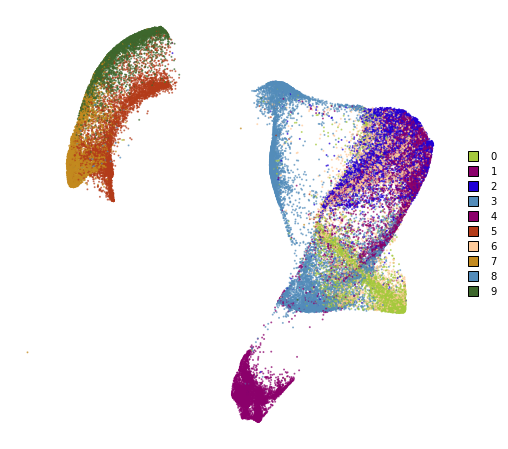

In [ ]:
%time embedding_train_12 = embedding_train.optimize(n_iter=250, exaggeration=12, momentum=0.8)
plot(embedding_train_12, y_train, colors=MNIST_COLORS) 

In [ ]:
embedding_test_12 = embedding_train_12.transform(x_test)
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_12, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test_12, y_test)
acc_knn

Iteration   50, KL divergence  199955.3009, 50 iterations in 0.3323 sec
Iteration  100, KL divergence  201629.9599, 50 iterations in 0.3539 sec
Iteration  150, KL divergence  202227.9653, 50 iterations in 0.3593 sec
Iteration  200, KL divergence  202619.3545, 50 iterations in 0.3463 sec
Iteration  250, KL divergence  202751.0076, 50 iterations in 0.3533 sec


0.5572

In [ ]:
neigh = KNeighborsClassifier(n_neighbors=5)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_12, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test_12, y_test)
acc_knn

0.533

Iteration   50, KL divergence  5.7182, 50 iterations in 6.8707 sec
Iteration  100, KL divergence  5.2567, 50 iterations in 6.9350 sec
Iteration  150, KL divergence  5.1203, 50 iterations in 6.9585 sec
Iteration  200, KL divergence  5.0543, 50 iterations in 6.9328 sec
Iteration  250, KL divergence  5.0129, 50 iterations in 6.9192 sec
CPU times: user 1min, sys: 385 ms, total: 1min 1s
Wall time: 35 s


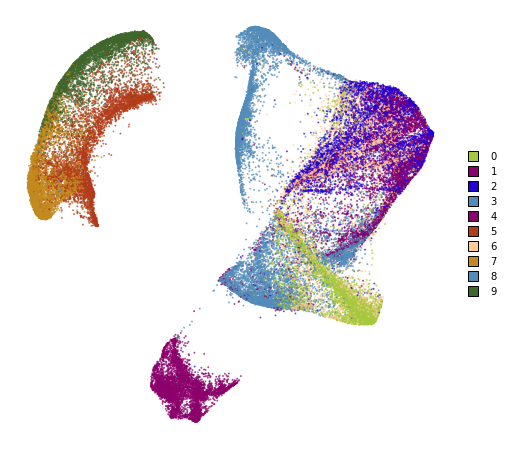

In [ ]:
%time embedding_train_1 = embedding_train.optimize(n_iter=250, exaggeration=8, momentum=0.5)
plot(embedding_train_1, y_train, colors=MNIST_COLORS)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_1, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test, y_test)
acc_knn

NameError: ignored

In [ ]:
%time embedding_train_1 = embedding_train.optimize(n_iter=250, exaggeration=8, momentum=0.5)
plot(embedding_train_1, y_train, colors=MNIST_COLORS)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_1, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test, y_test)
acc_knn

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

neigh = KNeighborsClassifier(n_neighbors=5)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_1, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test, y_test)
acc_knn

NameError: ignored

In [ ]:
# OPTIMIZED
%time embedding_train_2 = embedding_train_1.optimize(n_iter=750, momentum=0.8)

Iteration   50, KL divergence  4.0130, 50 iterations in 8.7107 sec
Iteration  100, KL divergence  3.4850, 50 iterations in 8.6961 sec
Iteration  150, KL divergence  3.2108, 50 iterations in 9.4573 sec
Iteration  200, KL divergence  3.0379, 50 iterations in 10.7020 sec
Iteration  250, KL divergence  2.9176, 50 iterations in 11.7441 sec
Iteration  300, KL divergence  2.8295, 50 iterations in 13.6283 sec
Iteration  350, KL divergence  2.7626, 50 iterations in 15.4494 sec
Iteration  400, KL divergence  2.7100, 50 iterations in 16.8960 sec
Iteration  450, KL divergence  2.6677, 50 iterations in 19.0609 sec
Iteration  500, KL divergence  2.6328, 50 iterations in 21.7604 sec
Iteration  550, KL divergence  2.6027, 50 iterations in 21.8845 sec
Iteration  600, KL divergence  2.5781, 50 iterations in 24.6510 sec
Iteration  650, KL divergence  2.5566, 50 iterations in 24.5404 sec
Iteration  700, KL divergence  2.5379, 50 iterations in 30.2742 sec
Iteration  750, KL divergence  2.5280, 50 iteration

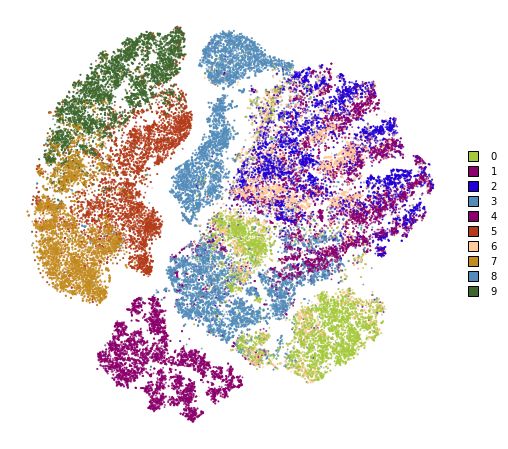

In [ ]:
plot(embedding_train_2, y_train, colors=MNIST_COLORS)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=1)
# Fit a nearest neighbor classifier on the embedded training set
neigh.fit(embedding_train_2, y_train)
# Compute the nearest neighbor accuracy on the embedded test set
acc_knn = neigh.score(embedding_test, y_test)
acc_knn

0.5584

In [ ]:
# Transform
%%time
embedding_test = embedding_train_2.prepare_partial(
    x_test,
    initialization="median",
    k=25,
    perplexity=5,
)

CPU times: user 19.6 s, sys: 289 ms, total: 19.9 s
Wall time: 10.6 s


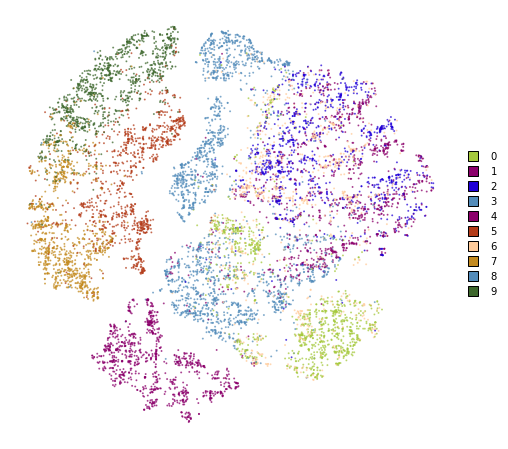

In [ ]:
plot(embedding_test, y_test, colors=MNIST_COLORS)


In [ ]:
# optimized transform
%time embedding_test_1 = embedding_test.optimize(n_iter=250, learning_rate=0.1, momentum=0.8)

Iteration   50, KL divergence  133880.0116, 50 iterations in 0.8342 sec
Iteration  100, KL divergence  131833.7294, 50 iterations in 0.2868 sec
Iteration  150, KL divergence  131537.1643, 50 iterations in 0.2870 sec
Iteration  200, KL divergence  131414.1107, 50 iterations in 0.2846 sec
Iteration  250, KL divergence  131346.1297, 50 iterations in 0.2762 sec
CPU times: user 2.54 s, sys: 30.2 ms, total: 2.57 s
Wall time: 1.98 s


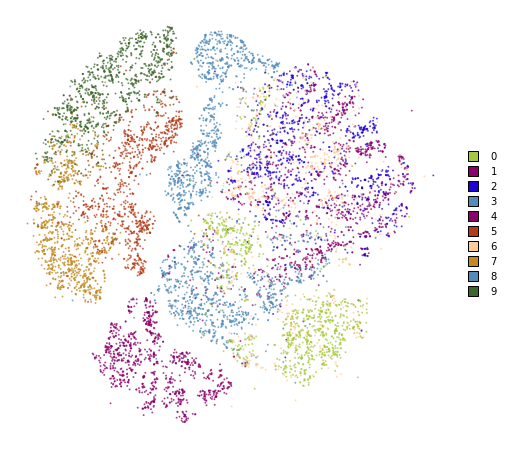

In [ ]:
plot(embedding_test_1, y_test, colors=MNIST_COLORS)

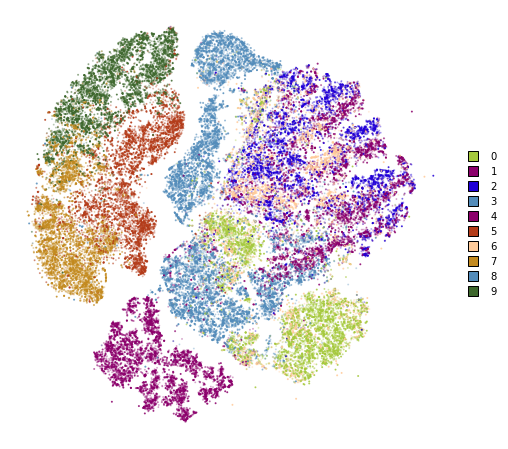

In [ ]:
# test and train super imposed
fig, ax = plt.subplots(figsize=(8, 8))
plot(embedding_train_2, y_train, colors=MNIST_COLORS, alpha=0.25, ax=ax)
plot(embedding_test_1, y_test, colors=MNIST_COLORS, alpha=0.75, ax=ax)

In [ ]:
# construct tsne embedding object
embedding_train = tsne.fit(x_train)

KeyboardInterrupt: ignored

In [ ]:
plot(embedding_train, pd.DataFrame(y_train)[0], colors=MNIST_COLORS)

In [ ]:
# Transform. Embed new points into an existing embedding
%time embedding_test = embedding_train.transform(x_test)

In [ ]:
plot(embedding_test, y_test, colors=MNIST_COLORS)


UMAP

NameError: ignored

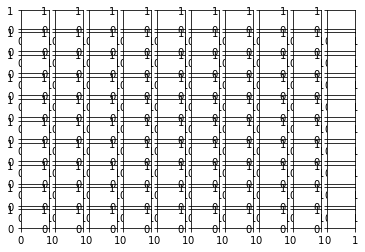

In [ ]:
fig, ax_array = plt.subplots(10, 10)
axes = ax_array.flatten()
for i, ax in enumerate(axes):
    ax.imshow(digits.images[i], cmap='gray_r')
plt.setp(axes, xticks=[], yticks=[], frame_on=False)
plt.tight_layout(h_pad=0.5, w_pad=0.01)

In [ ]:
from sklearn import datasets
digits = datasets.load_digits()
X = digits.data[:1000]
y = digits.target[:1000]

In [ ]:
X.shape

(1000, 64)

In [ ]:
digits.data.shape

(1797, 64)

In [ ]:
(trainX, trainy), (testX, testy)

In [ ]:
testX.shape

(10000, 28, 28)

In [ ]:
trainX = trainX.reshape(60000,784)
testX = testX.reshape(10000,784)

In [ ]:
import umap

reducer = umap.UMAP(random_state=42)
reducer.fit(trainX)

UMAP(a=None, angular_rp_forest=False, b=None,
     force_approximation_algorithm=False, init='spectral', learning_rate=1.0,
     local_connectivity=1.0, low_memory=False, metric='euclidean',
     metric_kwds=None, min_dist=0.1, n_components=2, n_epochs=None,
     n_neighbors=15, negative_sample_rate=5, output_metric='euclidean',
     output_metric_kwds=None, random_state=42, repulsion_strength=1.0,
     set_op_mix_ratio=1.0, spread=1.0, target_metric='categorical',
     target_metric_kwds=None, target_n_neighbors=-1, target_weight=0.5,
     transform_queue_size=4.0, transform_seed=42, unique=False, verbose=False)

In [ ]:
# look at the reducer object that has been trained on mnist dataset
# call transform to look at the embedding object
embedding = reducer.transform(trainX)
# Verify that the result of calling transform is
# idenitical to accessing the embedding_ attribute
assert(np.all(embedding == reducer.embedding_))
embedding.shape

(60000, 2)

In [ ]:
trainy.shape

(60000,)

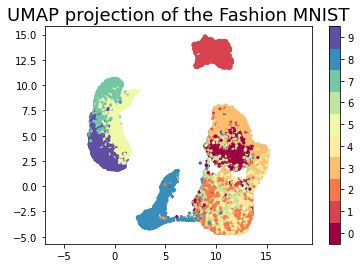

In [ ]:
plt.scatter(embedding[:, 0], embedding[:, 1], c=trainy, cmap='Spectral', s=5)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(boundaries=np.arange(11)-0.5).set_ticks(np.arange(10))
plt.title('UMAP projection of the Fashion MNIST', fontsize=18);

In [ ]:
def plot(
    x,
    y,
    ax=None,
    title=None,
    draw_legend=True,
    draw_centers=False,
    draw_cluster_labels=False,
    colors=None,
    legend_kwargs=None,
    label_order=None,
    **kwargs
):
    import matplotlib

    if ax is None:
        _, ax = matplotlib.pyplot.subplots(figsize=(8, 8))

    if title is not None:
        ax.set_title(title)

    plot_params = {"alpha": kwargs.get("alpha", 0.6), "s": kwargs.get("s", 1)}

    # Create main plot
    if label_order is not None:
        assert all(np.isin(np.unique(y), label_order))
        classes = [l for l in label_order if l in np.unique(y)]
    else:
        classes = np.unique(y)
    if colors is None:
        default_colors = matplotlib.rcParams["axes.prop_cycle"]
        colors = {k: v["color"] for k, v in zip(classes, default_colors())}

    point_colors = list(map(colors.get, y))

    ax.scatter(x[:, 0], x[:, 1], c=point_colors, rasterized=True, **plot_params)

    # Plot mediods
    if draw_centers:
        centers = []
        for yi in classes:
            mask = yi == y
            centers.append(np.median(x[mask, :2], axis=0))
        centers = np.array(centers)

        center_colors = list(map(colors.get, classes))
        ax.scatter(
            centers[:, 0], centers[:, 1], c=center_colors, s=48, alpha=1, edgecolor="k"
        )

        # Draw mediod labels
        if draw_cluster_labels:
            for idx, label in enumerate(classes):
                ax.text(
                    centers[idx, 0],
                    centers[idx, 1] + 2.2,
                    label,
                    fontsize=kwargs.get("fontsize", 6),
                    horizontalalignment="center",
                )

    # Hide ticks and axis
    ax.set_xticks([]), ax.set_yticks([]), ax.axis("off")

    if draw_legend:
        legend_handles = [
            matplotlib.lines.Line2D(
                [],
                [],
                marker="s",
                color="w",
                markerfacecolor=colors[yi],
                ms=10,
                alpha=1,
                linewidth=0,
                label=yi,
                markeredgecolor="k",
            )
            for yi in classes
        ]
        legend_kwargs_ = dict(loc="center left", bbox_to_anchor=(1, 0.5), frameon=False, )
        if legend_kwargs is not None:
            legend_kwargs_.update(legend_kwargs)
        ax.legend(handles=legend_handles, **legend_kwargs_)